In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = (224,224,3)

train_path = '/content/drive/MyDrive/Dataset/Training_Data'
valid_path = '/content/drive/MyDrive/Dataset/Test_Data'

In [ ]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Training_Data/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
 
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Training_Data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test_Data',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 62 images belonging to 5 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
8/8 [==============================] - 59s 6s/step - loss: 2.2998 - accuracy: 0.2829 - val_loss: 2.0813 - val_accuracy: 0.3871
Epoch 2/50
8/8 [==============================] - 6s 724ms/step - loss: 1.6757 - accuracy: 0.4382 - val_loss: 2.0015 - val_accuracy: 0.3871
Epoch 3/50
8/8 [==============================] - 6s 763ms/step - loss: 1.0078 - accuracy: 0.6335 - val_loss: 1.4095 - val_accuracy: 0.4355
Epoch 4/50
8/8 [==============================] - 6s 745ms/step - loss: 0.7884 - accuracy: 0.6932 - val_loss: 1.3156 - val_accuracy: 0.5161
Epoch 5/50
8/8 [==============================] - 6s 735ms/step - loss: 0.5237 - accuracy: 0.8247 - val_loss: 1.3325 - val_accuracy: 0.4677
Epoch 6/50
8/8 [==============================] - 6s 743ms/step - loss: 0.4401 - accuracy: 0.8805 - val_loss: 1.3342 - val_accuracy: 0.5968
Epoch 7/50
8/8 [==============================] - 6s 676ms/step - loss: 0.3489 - accuracy: 0.8924 - val_loss: 1.2643 - val_accuracy: 0.5806
Epoch 8/50
8/8 [======

In [ ]:
print("Accuracy of the model is-" , model.evaluate(training_set)[1]*100, "%")
print("loss of the model is-" , model.evaluate(test_set)[0])

8/8 [==============================] - 5s 637ms/step - loss: 0.0242 - accuracy: 0.9960
Accuracy of the model is- 99.60159659385681 %
62/62 [==============================] - 1s 14ms/step - loss: 1.3292 - accuracy: 0.6290
loss of the model is- 1.3291634321212769


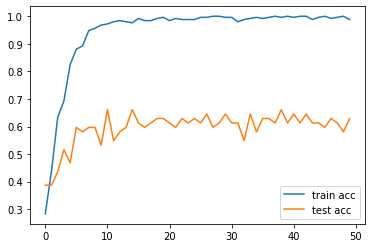

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

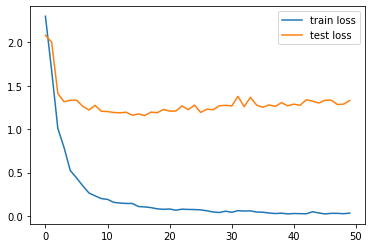

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/KalVGG16.h5')

In [ ]:

y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[9.73907351e-01, 2.29891911e-02, 1.17890108e-04, 1.35873083e-03,
        1.62676326e-03],
       [4.34383191e-03, 2.09841225e-02, 8.30793560e-01, 4.94225137e-02,
        9.44559947e-02],
       [2.01327712e-04, 1.02801959e-03, 1.14541501e-03, 1.03969024e-02,
        9.87228274e-01],
       [7.38625348e-01, 2.07693920e-01, 1.12246033e-02, 4.23107445e-02,
        1.45387283e-04],
       [2.80596733e-01, 3.79873882e-03, 2.21800036e-03, 2.39136931e-03,
        7.10995138e-01],
       [9.53817427e-01, 4.38894629e-02, 7.60713185e-04, 1.53184112e-03,
        5.45714386e-07],
       [4.36600670e-02, 8.34638536e-01, 8.78365040e-02, 1.45718816e-03,
        3.24078016e-02],
       [1.22444727e-01, 8.45402718e-01, 2.97108740e-02, 6.08262490e-04,
        1.83348672e-03],
       [8.50723870e-03, 2.97419310e-01, 1.84622213e-01, 1.75584164e-02,
        4.91892844e-01],
       [8.45054090e-01, 7.48724639e-02, 1.87299326e-02, 1.87556185e-02,
        4.25879583e-02],
       [9.10451591e-01, 4.8952